In [4]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras import utils as np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers
from tensorflow.keras import regularizers 

def load_data():  # categorical_crossentropy
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    number = 10000
    x_train = x_train[0:number]
    y_train = y_train[0:number]
    # The image is 28 * 28 size
    # Original train has 60K samples
    x_train = x_train.reshape(number, 28 * 28)
    x_test = x_test.reshape(x_test.shape[0], 28 * 28)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    # convert class vectors to binary class matrices
    print(y_train.shape)
    y_train = np_utils.to_categorical(y_train, 10)
    print(y_train.shape)
    y_test = np_utils.to_categorical(y_test, 10)
    x_train = x_train
    x_test = x_test
    x_test = np.random.normal(x_test)  # 加噪声
    x_train = x_train / 255
    x_test = x_test / 255

    return (x_train, y_train), (x_test, y_test)
  
callbacks=[keras.callbacks.EarlyStopping(monitor='loss',patience=3)]


(array([1001., 1127.,  991., 1032.,  980.,  863., 1014., 1070.,  944.,
         978.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

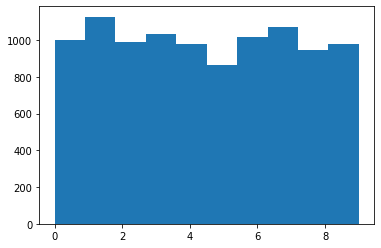

In [19]:
import matplotlib.pyplot as plt

plt.hist(np.argmax(y_train, axis=1))

(array([ 980., 1135., 1032., 1010.,  982.,  892.,  958., 1028.,  974.,
        1009.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

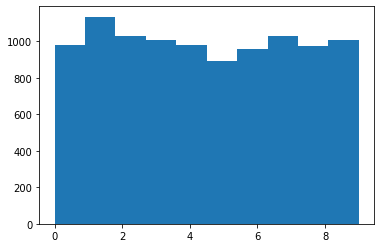

In [20]:
plt.hist(np.argmax(y_test, axis=1))

In [5]:
# load training data and testing data
(x_train, y_train), (x_test, y_test) = load_data()

# define network structure
model = Sequential()

model.add(Dense(input_dim=28 * 28, units=1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1000, activation='relu', 
                kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-3)))
model.add(Dense(units=1000, activation='relu', 
                kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-3)))
model.add(Dense(units=1000, activation='relu', 
                kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-3)))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))

# set configurations
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# train model
model.fit(x_train, y_train,
          batch_size=100, epochs=50, callbacks=callbacks)

# evaluate the model and output the accuracy
result_train = model.evaluate(x_train, y_train);
result_test = model.evaluate(x_test, y_test);
print('Train Acc:', result_train[1])
print('Test Acc:', result_test[1])

11501568/11490434 [==============================] - 0s 0us/step
(10000,)
(10000, 10)
Epoch 1/50
100/100 [==============================] - 2s 4ms/step - loss: 21.8854 - accuracy: 0.7045
Epoch 2/50
100/100 [==============================] - 0s 3ms/step - loss: 1.7712 - accuracy: 0.8540
Epoch 3/50
100/100 [==============================] - 0s 4ms/step - loss: 1.2981 - accuracy: 0.8895
Epoch 4/50
100/100 [==============================] - 0s 3ms/step - loss: 1.1302 - accuracy: 0.9029
Epoch 5/50
100/100 [==============================] - 0s 3ms/step - loss: 1.0276 - accuracy: 0.9185
Epoch 6/50
100/100 [==============================] - 0s 3ms/step - loss: 0.9590 - accuracy: 0.9272
Epoch 7/50
100/100 [==============================] - 0s 3ms/step - loss: 0.9054 - accuracy: 0.9343
Epoch 8/50
100/100 [==============================] - 0s 3ms/step - loss: 0.8651 - accuracy: 0.9417
Epoch 9/50
100/100 [==============================] - 0s 4ms/step - loss: 0.8227 - accuracy: 0.9472
Epoch 10/50
1

In [6]:
# load training data and testing data
(x_train, y_train), (x_test, y_test) = load_data()

# define network structure
model = Sequential()

model.add(Dense(input_dim=28 * 28, units=1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1000, activation='relu', 
                kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-3)))
model.add(Dense(units=1000, activation='relu', 
                kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-3)))
model.add(Dense(units=1000, activation='relu', 
                kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-3)))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))

# set configurations
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# train model
model.fit(x_train, y_train,
          batch_size=100, epochs=50, callbacks=callbacks)

# evaluate the model and output the accuracy
result_train = model.evaluate(x_train, y_train);
result_test = model.evaluate(x_test, y_test);
print('Train Acc:', result_train[1])
print('Test Acc:', result_test[1])

(10000,)
(10000, 10)
Epoch 1/50
100/100 [==============================] - 1s 3ms/step - loss: 85.7679 - accuracy: 0.1829
Epoch 2/50
100/100 [==============================] - 0s 3ms/step - loss: 82.2991 - accuracy: 0.4235
Epoch 3/50
100/100 [==============================] - 0s 3ms/step - loss: 78.7213 - accuracy: 0.5853
Epoch 4/50
100/100 [==============================] - 0s 3ms/step - loss: 75.1532 - accuracy: 0.6774
Epoch 5/50
100/100 [==============================] - 0s 3ms/step - loss: 71.8401 - accuracy: 0.7425
Epoch 6/50
100/100 [==============================] - 0s 3ms/step - loss: 68.7326 - accuracy: 0.7738
Epoch 7/50
100/100 [==============================] - 0s 3ms/step - loss: 65.7381 - accuracy: 0.8037
Epoch 8/50
100/100 [==============================] - 0s 3ms/step - loss: 62.8413 - accuracy: 0.8175
Epoch 9/50
100/100 [==============================] - 0s 3ms/step - loss: 60.0181 - accuracy: 0.8320
Epoch 10/50
100/100 [==============================] - 0s 3ms/step - l

In [7]:
# load training data and testing data
(x_train, y_train), (x_test, y_test) = load_data()

# define network structure
model = Sequential()

model.add(Dense(input_dim=28 * 28, units=1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1000, activation='relu', 
                kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-3)))
model.add(Dense(units=1000, activation='relu', 
                kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-3)))
model.add(Dense(units=1000, activation='relu', 
                kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-3)))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))

# set configurations
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

# train model
model.fit(x_train, y_train,
          batch_size=100, epochs=50, callbacks=callbacks)

# evaluate the model and output the accuracy
result_train = model.evaluate(x_train, y_train);
result_test = model.evaluate(x_test, y_test);
print('Train Acc:', result_train[1])
print('Test Acc:', result_test[1])

(10000,)
(10000, 10)
Epoch 1/50
100/100 [==============================] - 1s 4ms/step - loss: 16.0428 - accuracy: 0.5642
Epoch 2/50
100/100 [==============================] - 0s 4ms/step - loss: 2.7774 - accuracy: 0.7947
Epoch 3/50
100/100 [==============================] - 0s 4ms/step - loss: 2.4255 - accuracy: 0.8659
Epoch 4/50
100/100 [==============================] - 0s 4ms/step - loss: 2.2761 - accuracy: 0.8894
Epoch 5/50
100/100 [==============================] - 0s 4ms/step - loss: 2.1806 - accuracy: 0.9047
Epoch 6/50
100/100 [==============================] - 0s 4ms/step - loss: 2.1164 - accuracy: 0.9209
Epoch 7/50
100/100 [==============================] - 0s 4ms/step - loss: 2.0602 - accuracy: 0.9273
Epoch 8/50
100/100 [==============================] - 0s 4ms/step - loss: 2.0035 - accuracy: 0.9337
Epoch 9/50
100/100 [==============================] - 0s 4ms/step - loss: 1.9670 - accuracy: 0.9426
Epoch 10/50
100/100 [==============================] - 0s 4ms/step - loss: 1.9

In [8]:
# load training data and testing data
(x_train, y_train), (x_test, y_test) = load_data()

# define network structure
model = Sequential()

model.add(Dense(input_dim=28 * 28, units=1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1000, activation='relu', 
                kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-3)))
model.add(Dense(units=1000, activation='relu', 
                kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-3)))
model.add(Dense(units=1000, activation='relu', 
                kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-3)))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))

# set configurations
model.compile(loss='categorical_crossentropy', optimizer='Adagrad', metrics=['accuracy'])

# train model
model.fit(x_train, y_train,
          batch_size=100, epochs=50, callbacks=callbacks)

# evaluate the model and output the accuracy
result_train = model.evaluate(x_train, y_train);
result_test = model.evaluate(x_test, y_test);
print('Train Acc:', result_train[1])
print('Test Acc:', result_test[1]) 

(10000,)
(10000, 10)
Epoch 1/50
100/100 [==============================] - 1s 4ms/step - loss: 86.8871 - accuracy: 0.1372
Epoch 2/50
100/100 [==============================] - 0s 4ms/step - loss: 85.7787 - accuracy: 0.2099
Epoch 3/50
100/100 [==============================] - 0s 3ms/step - loss: 84.6821 - accuracy: 0.2885
Epoch 4/50
100/100 [==============================] - 0s 3ms/step - loss: 83.5813 - accuracy: 0.3674
Epoch 5/50
100/100 [==============================] - 0s 3ms/step - loss: 82.4693 - accuracy: 0.4450
Epoch 6/50
100/100 [==============================] - 0s 3ms/step - loss: 81.3471 - accuracy: 0.5083
Epoch 7/50
100/100 [==============================] - 0s 3ms/step - loss: 80.2074 - accuracy: 0.5558
Epoch 8/50
100/100 [==============================] - 0s 3ms/step - loss: 79.0600 - accuracy: 0.5808
Epoch 9/50
100/100 [==============================] - 0s 3ms/step - loss: 77.9184 - accuracy: 0.6188
Epoch 10/50
100/100 [==============================] - 0s 3ms/step - l

In [9]:
# load training data and testing data
(x_train, y_train), (x_test, y_test) = load_data()

# define network structure
model = Sequential()

model.add(Dense(input_dim=28 * 28, units=1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1000, activation='relu', 
                kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-3)))
model.add(Dense(units=1000, activation='relu', 
                kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-3)))
model.add(Dense(units=1000, activation='relu', 
                kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-3)))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))

# set configurations
model.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])

# train model
model.fit(x_train, y_train,
          batch_size=100, epochs=50, callbacks=callbacks)

# evaluate the model and output the accuracy
result_train = model.evaluate(x_train, y_train);
result_test = model.evaluate(x_test, y_test);
print('Train Acc:', result_train[1])
print('Test Acc:', result_test[1]) 

(10000,)
(10000, 10)
Epoch 1/50
100/100 [==============================] - 1s 4ms/step - loss: 87.3125 - accuracy: 0.1099
Epoch 2/50
100/100 [==============================] - 0s 4ms/step - loss: 87.0480 - accuracy: 0.1156
Epoch 3/50
100/100 [==============================] - 0s 4ms/step - loss: 86.7754 - accuracy: 0.1249
Epoch 4/50
100/100 [==============================] - 0s 4ms/step - loss: 86.4983 - accuracy: 0.1324
Epoch 5/50
100/100 [==============================] - 0s 4ms/step - loss: 86.2206 - accuracy: 0.1404
Epoch 6/50
100/100 [==============================] - 0s 4ms/step - loss: 85.9362 - accuracy: 0.1565
Epoch 7/50
100/100 [==============================] - 0s 4ms/step - loss: 85.6582 - accuracy: 0.1567
Epoch 8/50
100/100 [==============================] - 0s 4ms/step - loss: 85.3701 - accuracy: 0.1747
Epoch 9/50
100/100 [==============================] - 0s 4ms/step - loss: 85.0907 - accuracy: 0.1800
Epoch 10/50
100/100 [==============================] - 0s 4ms/step - l

In [10]:
# load training data and testing data
(x_train, y_train), (x_test, y_test) = load_data()

# define network structure
model = Sequential()

model.add(Dense(input_dim=28 * 28, units=1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1000, activation='relu', 
                kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-3)))
model.add(Dense(units=1000, activation='relu', 
                kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-3)))
model.add(Dense(units=1000, activation='relu', 
                kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-3)))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))

# set configurations
model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])

# train model
model.fit(x_train, y_train,
          batch_size=100, epochs=50, callbacks=callbacks)

# evaluate the model and output the accuracy
result_train = model.evaluate(x_train, y_train);
result_test = model.evaluate(x_test, y_test);
print('Train Acc:', result_train[1])
print('Test Acc:', result_test[1]) 

(10000,)
(10000, 10)
Epoch 1/50
100/100 [==============================] - 1s 4ms/step - loss: 32.2492 - accuracy: 0.6917
Epoch 2/50
100/100 [==============================] - 0s 4ms/step - loss: 5.3436 - accuracy: 0.8380
Epoch 3/50
100/100 [==============================] - 0s 4ms/step - loss: 2.4763 - accuracy: 0.8470
Epoch 4/50
100/100 [==============================] - 0s 4ms/step - loss: 1.7516 - accuracy: 0.8634
Epoch 5/50
100/100 [==============================] - 0s 4ms/step - loss: 1.4571 - accuracy: 0.8740
Epoch 6/50
100/100 [==============================] - 0s 4ms/step - loss: 1.3110 - accuracy: 0.8816
Epoch 7/50
100/100 [==============================] - 0s 3ms/step - loss: 1.2107 - accuracy: 0.8924
Epoch 8/50
100/100 [==============================] - 0s 4ms/step - loss: 1.1448 - accuracy: 0.8922
Epoch 9/50
100/100 [==============================] - 0s 4ms/step - loss: 1.0923 - accuracy: 0.8986
Epoch 10/50
100/100 [==============================] - 0s 4ms/step - loss: 1.0

In [11]:
# load training data and testing data
(x_train, y_train), (x_test, y_test) = load_data()

# define network structure
model = Sequential()

model.add(Dense(input_dim=28 * 28, units=1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1000, activation='relu', 
                kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-3)))
model.add(Dense(units=1000, activation='relu', 
                kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-3)))
model.add(Dense(units=1000, activation='relu', 
                kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-3)))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))

# set configurations
model.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])

# train model
model.fit(x_train, y_train,
          batch_size=100, epochs=50, callbacks=callbacks)

# evaluate the model and output the accuracy
result_train = model.evaluate(x_train, y_train);
result_test = model.evaluate(x_test, y_test);
print('Train Acc:', result_train[1])
print('Test Acc:', result_test[1]) 

(10000,)
(10000, 10)
Epoch 1/50
100/100 [==============================] - 2s 5ms/step - loss: 23.9953 - accuracy: 0.6445
Epoch 2/50
100/100 [==============================] - 1s 5ms/step - loss: 2.2299 - accuracy: 0.8355
Epoch 3/50
100/100 [==============================] - 1s 5ms/step - loss: 1.7463 - accuracy: 0.8781
Epoch 4/50
100/100 [==============================] - 1s 5ms/step - loss: 1.5528 - accuracy: 0.9059
Epoch 5/50
100/100 [==============================] - 1s 5ms/step - loss: 1.4478 - accuracy: 0.9168
Epoch 6/50
100/100 [==============================] - 0s 5ms/step - loss: 1.3780 - accuracy: 0.9255
Epoch 7/50
100/100 [==============================] - 1s 5ms/step - loss: 1.3163 - accuracy: 0.9339
Epoch 8/50
100/100 [==============================] - 1s 5ms/step - loss: 1.2693 - accuracy: 0.9402
Epoch 9/50
100/100 [==============================] - 1s 5ms/step - loss: 1.2266 - accuracy: 0.9457
Epoch 10/50
100/100 [==============================] - 1s 5ms/step - loss: 1.1

In [12]:
# load training data and testing data
(x_train, y_train), (x_test, y_test) = load_data()

# define network structure
model = Sequential()

model.add(Dense(input_dim=28 * 28, units=1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1000, activation='relu', 
                kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-3)))
model.add(Dense(units=1000, activation='relu', 
                kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-3)))
model.add(Dense(units=1000, activation='relu', 
                kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-3)))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))

# set configurations
model.compile(loss='categorical_crossentropy', optimizer='Ftrl', metrics=['accuracy'])

# train model
model.fit(x_train, y_train,
          batch_size=100, epochs=50, callbacks=callbacks)

# evaluate the model and output the accuracy
result_train = model.evaluate(x_train, y_train);
result_test = model.evaluate(x_test, y_test);
print('Train Acc:', result_train[1])
print('Test Acc:', result_test[1]) 

(10000,)
(10000, 10)
Epoch 1/50
100/100 [==============================] - 1s 4ms/step - loss: 3.1588 - accuracy: 0.1113
Epoch 2/50
100/100 [==============================] - 0s 4ms/step - loss: 2.3072 - accuracy: 0.1127
Epoch 3/50
100/100 [==============================] - 0s 4ms/step - loss: 2.3071 - accuracy: 0.1127
Epoch 4/50
100/100 [==============================] - 0s 4ms/step - loss: 2.3070 - accuracy: 0.1127
Epoch 5/50
100/100 [==============================] - 0s 4ms/step - loss: 2.3070 - accuracy: 0.1127
Epoch 6/50
100/100 [==============================] - 0s 4ms/step - loss: 2.3069 - accuracy: 0.1127
Epoch 7/50
100/100 [==============================] - 0s 4ms/step - loss: 2.3069 - accuracy: 0.1127
Epoch 8/50
100/100 [==============================] - 0s 4ms/step - loss: 2.3068 - accuracy: 0.1127
Epoch 9/50
100/100 [==============================] - 0s 4ms/step - loss: 2.3068 - accuracy: 0.1127
Epoch 10/50
100/100 [==============================] - 0s 4ms/step - loss: 2.30